### Introduction

Research around the human microbiome (the collection of bacteria and microbes that live in and on our bodies) has been growing as a science and field of interest more and more over the last decade (Ursell et al., 2012). Many people experience disruptions to their health that could be attributed to an imbalance of these little organisms that share life with each of us (Ursell et al., 2012). Gastrointestinal (GI/gut) health is of particular interest, and investigations around how to improve this ecosystem within us are expanding. One approach to achieve this is Fecal Microbiota Transplant (FMT). <br>

FMT is a method of transferring a healthy population (high species quantity and diversity) of microbes from one person to another in hopes of restoring the bacterial colonies in the recipient and thus contributing to greater overall health (Orr, et al. 2018). FMT has been used as a therapy for a limited selection of illnesses (and is not approved for many uses in the USA), but it is gaining relevance as a therapeutic application for a wide variety of infections, gastrointestinal issues, and auto-immune disorders (Gupta et al., 2016). FMT could be an effective intervention for a variety of health issues caused by diet, environment, overuse of antibiotics, and other factors. <br>

In order to successfully implement an intervention such as this, we need to understand the structure of human microbiota. Using data sourced from [NIH Human Microbiome Project](https://www.hmpdacc.org/hmp/catalog/grid.php?dataset=genomic), I will run an EDA to explore the species types and prevalence. For the EDA portion, I will be roughly following [this](https://www.kaggle.com/code/bbhatt001/eda-of-the-human-microbiome/input) Kaggle notebook. The dataset utilized for that project is older (as the project is in constant motion), so although it is a great framework, my approach will have to be adjusted. Moving beyond this step, I would like to build models to predict the presence of these microbes to potentially  I will likely reference [this](https://www.kaggle.com/code/jaytee691/microbes-99-5-accuracy-knn-rf-gb-mlp/input) or [this](https://www.kaggle.com/code/rohannemade/90-accuracy-microbes-classification) dataset. 

According to [AWS](https://registry.opendata.aws/human-microbiome-project/): "The NIH-funded Human Microbiome Project (HMP) is a collaborative effort of over 300 scientists from more than 80 organizations to comprehensively characterize the microbial communities inhabiting the human body and elucidate their role in human health and disease. To accomplish this task, microbial community samples were isolated from a cohort of 300 healthy adult human subjects at 18 specific sites within five regions of the body (oral cavity, airways, urogenital track, skin, and gut). Targeted sequencing of the 16S bacterial marker gene and/or whole metagenome shotgun sequencing was performed for thousands of these samples. In addition, whole genome sequences were generated for isolate strains collected from human body sites to act as reference organisms for analysis. Finally, 16S marker and whole metagenome sequencing was also done on additional samples from people suffering from several disease conditions."

 - Gupta, S., Allen-Vercoe, E., & Petrof, E. O. (2016). Fecal microbiota transplantation: in perspective. Therapeutic Advances in Gastroenterology, 9(2), 229-239. https://doi.org/10.1177/1756283X15607414

 - Orr, M. R., Kocurek, K. M., & Young, D. L. **(that's me!)** (2018). Gut Microbiota and Human Health: Insights From Ecological Restoration. The Quarterly Review of Biology, 93(2), 73–90. https://doi.org/10.1086/698021  
 
 - Ursell, L. K., Metcalf, J. L., Parfrey, L. W., & Knight, R. (2012). Defining the Human Microbiome. Nutrition reviews, 70(Suppl 1), S38. https://doi.org/10.1111/j.1753-4887.2012.00493.


#### Milestone 1

### Import and Cleaning

In [9]:
#import libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#part 2
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, FeatureUnion

microbes=pd.read_csv('/Users/debane/Documents/MS Data Science/550 Data Mining/project_catalog.csv')
#####pd.set_option('display.max_rows', None, 'display.max_columns', None)


In [10]:
#View sample of data
microbes.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",NaN,NaN
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",NaN,NaN
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,NaN,NaN
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",NaN,NaN
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,NaN,NaN


In [11]:
#Check shape
microbes.shape

(2915, 19)

In [12]:
#See column names in dataset
microbes.columns 

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [13]:
#View descriptions of data 
microbes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HMP ID                   2915 non-null   int64  
 1   GOLD ID                  1783 non-null   object 
 2   Organism Name            2915 non-null   object 
 3   Domain                   2712 non-null   object 
 4   NCBI Superkingdom        2751 non-null   object 
 5   HMP Isolation Body Site  2915 non-null   object 
 6   Project Status           2915 non-null   object 
 7   Current Finishing Level  1579 non-null   object 
 8   NCBI Submission Status   2915 non-null   object 
 9   NCBI Project ID          2915 non-null   int64  
 10  Genbank ID               1579 non-null   object 
 11  Gene Count               2915 non-null   int64  
 12  IMG/HMP ID               2915 non-null   int64  
 13  HOMD ID                  397 non-null    object 
 14  Sequencing Center       

There is a broad range of information here, some of which may be beneficial to study regardless of project status, but for efficacy of this project, I'd like to check how many of the entires are complete.

In [14]:
microbes['Project Status'].value_counts()

Project Status
Complete       1579
In Progress    1336
Name: count, dtype: int64

I'm going to remove any entries that are "in progress" from the main dataframe and place them in a new dataframe so I have it for running later if I want.

In [15]:
# Split Dataframe using groupby() &
# grouping by particular dataframe column
grouped = microbes.groupby(['Project Status'])
microbes_in_progress = grouped.get_group("In Progress")
microbes_in_progress.shape

(1336, 19)

In [16]:
# Split Dataframe using groupby() &
# grouping by particular dataframe column
grouped = microbes.groupby(['Project Status'])
microbes_complete = grouped.get_group("Complete")
microbes_complete.shape

(1579, 19)

In [17]:
#rename group of "complete" for ease 
micro = microbes_complete
micro.shape

(1579, 19)

In [18]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1579 entries, 0 to 2914
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HMP ID                   1579 non-null   int64  
 1   GOLD ID                  1493 non-null   object 
 2   Organism Name            1579 non-null   object 
 3   Domain                   1552 non-null   object 
 4   NCBI Superkingdom        1462 non-null   object 
 5   HMP Isolation Body Site  1579 non-null   object 
 6   Project Status           1579 non-null   object 
 7   Current Finishing Level  1579 non-null   object 
 8   NCBI Submission Status   1579 non-null   object 
 9   NCBI Project ID          1579 non-null   int64  
 10  Genbank ID               1579 non-null   object 
 11  Gene Count               1579 non-null   int64  
 12  IMG/HMP ID               1579 non-null   int64  
 13  HOMD ID                  386 non-null    object 
 14  Sequencing Center        1579

I'm curious about some of the columns that have null values. The ones that are important to organism analysis are "Domain", and "NCBI Superkingdom".

In [19]:
micro[['Domain','NCBI Superkingdom']].isnull().sum()

Domain                27
NCBI Superkingdom    117
dtype: int64

In [20]:
micro.groupby('Domain').count()

,HMP ID,GOLD ID,Organism Name,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
Domain,,,,,,,,,,,,,,,,,,
ARCHAEAL,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,0,0
BACTERIAL,1541,1487,1541,1440,1541,1541,1541,1541,1541,1541,1541,1541,386,1541,1541,1247,0,0
EUKARYAL,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,2,0,0
VIRUS,5,0,5,5,5,5,5,5,5,5,5,5,0,5,5,5,0,0


In [21]:
micro.groupby('NCBI Superkingdom').count()

,HMP ID,GOLD ID,Organism Name,Domain,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
NCBI Superkingdom,,,,,,,,,,,,,,,,,,
Archaea,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,0,0
Bacteria,1448,1384,1448,1437,1448,1448,1448,1448,1448,1448,1448,1448,374,1448,1448,1192,0,0
Error!!!,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0
Eukaryota,4,4,4,4,4,4,4,4,4,4,4,4,0,4,4,2,0,0
Viruses,5,0,5,5,5,5,5,5,5,5,5,5,0,5,5,5,0,0


There is an "Error!!!" value for Superkingdom, so that's nice to be able to see exactly what I should replace. I'll start by checking those values specfically.

In [22]:
micro[micro['NCBI Superkingdom']=='Error!!!']

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
2478,9176,Gi05045,Streptococcus downei F0415,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53567,AEKN00000000,2204,649990005,HOMD: tax_594,J. Craig Venter Institute,NIH-HMP Jumpstart Supplement,BEI HM-475,NaN,NaN
2481,9180,Gi05049,Streptococcus peroris ATCC 700780,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53059,AEVF00000000,1638,649990011,HOMD: tax_728,Baylor College of Medicine,NIH-HMP,ATCC 700780,NaN,NaN
2487,9192,Gi05061,Streptococcus vestibularis F0396,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53573,AEKO00000000,1979,649990017,HOMD: tax_21,J. Craig Venter Institute,NIH-NIAID,BEI HM-561,NaN,NaN


All three are in the Bacterial domain, so I can replace their values with "Bacteria"

In [23]:
micro['NCBI Superkingdom'].replace('Error!!!', 'Bacteria', inplace=True)

I can infer the Domain based on the Superkingdom and vice versa, but I can't use any values where both are missing, so I'll check those.

In [24]:
len(micro.loc[micro['Domain'].isnull()& micro['NCBI Superkingdom'].isnull()])

16

There are 16 values that have both missing so I'm going to drop those.

In [25]:
micro=micro.drop(micro[(micro['Domain'].isnull()) & (micro['NCBI Superkingdom'].isnull())].index)
micro.shape

(1563, 19)

In order to replace the other values, I'm going to transform them to NaN first.

In [26]:
micro['NCBI Superkingdom'].fillna('NaN', inplace=True)

In [27]:
(micro['NCBI Superkingdom'] == "NaN").value_counts()

NCBI Superkingdom
False    1462
True      101
Name: count, dtype: int64

In [28]:
micro['Domain'].fillna('NaN', inplace=True)

In [29]:
#check value counts
(micro['Domain'] == "NaN").value_counts()

Domain
False    1552
True       11
Name: count, dtype: int64

I'm going to replace all of the Domain values with their relative Superkingdom name where applicable using pandas transform function.

In [30]:
#make dataframe containing only rows with NaN in Domain or Superkingdom
micro_null = micro[(micro['Domain'] == "NaN") | (micro['NCBI Superkingdom'] == "NaN")]

In [31]:
#See which rows have NaN to compare with their Superkingdom value
micro_null.loc[micro_null['Domain'] == "NaN"]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
1314,1978,NaN,Actinomyces graevenitzii F0530,NaN,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,198881,AWSC01000000,1897,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,BEI HM-1132,NaN,NaN
1463,2128,NaN,Arthrobacter albus DNF00011,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219659,JRNH00000000,1596,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1152,NaN,NaN
1464,2129,NaN,Corynebacterium tuscaniense DNF00037,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219660,JRNG00000000,1792,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1153,NaN,NaN
1465,2130,NaN,Oligella urethralis DNF00040,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219661,JRNI00000000,2118,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1154,NaN,NaN
1467,2132,NaN,Prevotella histicola JCM 15637 = DNF00424,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219666,JRNJ00000000,2358,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI Processing,NaN,NaN
1469,2134,NaN,Peptoniphilus lacrimalis DNF00528,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219668,JRNL00000000,3237,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1161,NaN,NaN
1470,2135,NaN,Staphylococcus haemolyticus DNF00585,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219669,JRNK00000000,2173,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1164,NaN,NaN
1471,2136,NaN,Prevotella bivia DNF00650,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219670,JRNM00000000,1973,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1165,NaN,NaN
1472,2137,NaN,Prevotella buccalis DNF00853,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219672,JRNN00000000,2232,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1169,NaN,NaN
1474,2139,NaN,Prevotella denticola DNF00960,NaN,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,219676,JRNO00000000,2355,0,NaN,J. Craig Venter Institute,NIH-HMP,BEI HM-1173,NaN,NaN


In [32]:
#count nulls to compare
(micro['Domain'] == "NaN").sum()

11

In [33]:
#Replace NaN values with "BACTERIAL"
micro["Domain"] = micro['Domain'].replace(["NaN"], "BACTERIAL")
micro

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",NaN,NaN
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",NaN,NaN
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,NaN,NaN
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",NaN,NaN
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,9995,Gi08654,Staphylococcus epidermidis NIHLM095,BACTERIAL,Bacteria,unknown,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,62345,AKGI00000000,2300,0,NaN,NIH Intramural Sequencing Center (NISC),NIH-HMP Demo Projects,BEI HM-909,NaN,NaN
2911,9996,Gi09593,Aggregatibacter actinomycetemcomitans Y4,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67199,AMEN00000000,2343,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,ATCC 43718,NaN,NaN
2912,9997,Gi09594,Corynebacterium durum F0235,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67201,AMEM00000000,2823,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,BEI HM-755,NaN,NaN
2913,9998,Gi09595,Peptostreptococcus anaerobius VPI 4330,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67203,AMEL00000000,1933,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,ATCC 27337,NaN,NaN


In [34]:
#Check that values replaced
(micro['Domain'] == "NaN").sum()

0

Then I'll replace all of the Superkingdom values with their Domain name where applicable using pandas transform function.

In [35]:
#Check values for Domain in regard to Superkingdom NaNs
kingdom = micro_null.loc[micro_null['NCBI Superkingdom'] == "NaN"]
kingdom['Domain'].value_counts()

Domain
BACTERIAL    101
Name: count, dtype: int64

All of the missing Superkingdom values are in the Bacterial domain, so we can replace them with the relative value of "Bacteria".

In [36]:
#count nulls to compare
(micro_null['NCBI Superkingdom'] == "NaN").sum()

101

In [37]:
#Replace NaN values with "BACTERIAL"
micro["NCBI Superkingdom"] = micro['NCBI Superkingdom'].replace(['NaN'], 'Bacteria')
micro

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",NaN,NaN
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",NaN,NaN
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,NaN,NaN
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",NaN,NaN
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,9995,Gi08654,Staphylococcus epidermidis NIHLM095,BACTERIAL,Bacteria,unknown,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,62345,AKGI00000000,2300,0,NaN,NIH Intramural Sequencing Center (NISC),NIH-HMP Demo Projects,BEI HM-909,NaN,NaN
2911,9996,Gi09593,Aggregatibacter actinomycetemcomitans Y4,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67199,AMEN00000000,2343,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,ATCC 43718,NaN,NaN
2912,9997,Gi09594,Corynebacterium durum F0235,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67201,AMEM00000000,2823,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,BEI HM-755,NaN,NaN
2913,9998,Gi09595,Peptostreptococcus anaerobius VPI 4330,BACTERIAL,Bacteria,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,67203,AMEL00000000,1933,0,NaN,Washington University Genome Sequencing Center,NIH-HMP Sequencing Center,ATCC 27337,NaN,NaN


In [38]:
#Check that values replaced
(micro['NCBI Superkingdom'] == "NaN").sum()

0

### Exploration

**Then, do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.**

Now that those are cleaned up, I'm going to review the full dataset based on Gene Count to start.

In [39]:
micro['Gene Count'].describe()

count    1563.000000
mean     2729.550864
std      1288.903478
min         0.000000
25%      1956.000000
50%      2411.000000
75%      3176.000000
max      8490.000000
Name: Gene Count, dtype: float64

There are no non-null values for "Gene Count", but msome are counted as 0.

In [40]:
micro_gene_count=micro[micro['Gene Count']==0]
micro_gene_count['NCBI Superkingdom'].value_counts()

NCBI Superkingdom
Bacteria     47
Viruses       5
Eukaryota     4
Name: count, dtype: int64

There are 47 bacteria, 5 viruses, and 4 eukaryota absent from the count. Because these may be based on a reporting error, I may want to drop these later to improve the model, but I'll keep them for now.

There are many species listed in this project, so I want to look at their distribution of gene count frequency.

<Axes: ylabel='Frequency'>

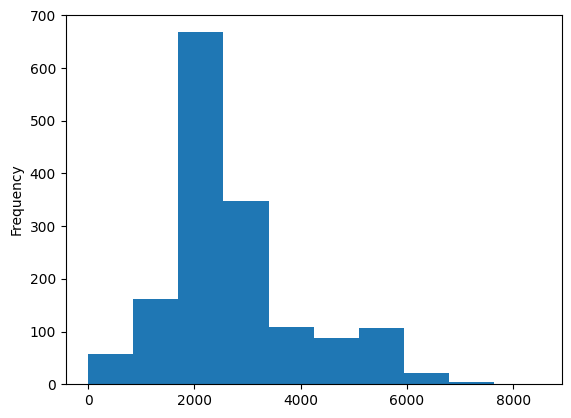

In [41]:
micro["Gene Count"].plot(kind='hist')

<Axes: xlabel='Gene Count', ylabel='Count'>

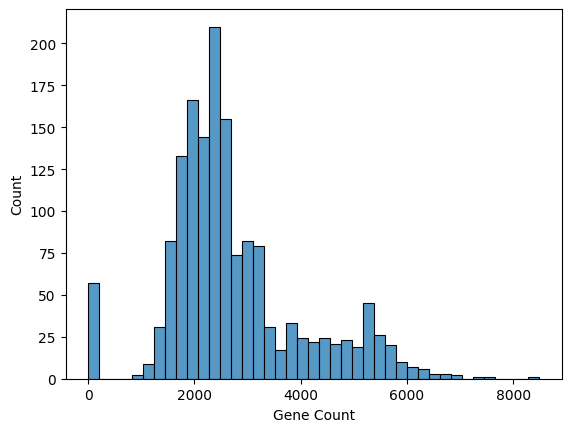

In [42]:
sns.histplot(data=micro, x="Gene Count")

Interestingly, there is an almost normal distribution, skewed right, but we can see that the species with gene counts in the middle range have the highest freqency. 

I'm curious about the microbe with the highest gene count (max value from the descriptive statistics), with a value of 8490.

In [43]:
micro[micro['Gene Count']==8490]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
679,1211,Gi10716,Streptomyces sp. HGB0020,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,72491,AGER00000000,8490,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-789,NaN,NaN


I want to check to see if there is another Streptomyces species with high prevalence.

In [44]:
micro[micro['Organism Name'].str.contains("Streptomyces")]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18
679,1211,Gi10716,Streptomyces sp. HGB0020,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,72491,AGER00000000,8490,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-789,NaN,NaN
934,1486,Gi16997,Streptomyces sp. HPH0547,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,169487,ATCE00000000,6635,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-859,NaN,NaN


The presences of another Streoptomyces with a high gene count makes me think that it may be beneficial to sort organisms on their genus. I'm going make a new dataframe and attempt to add a column for genus by extracting the first word of the Organism Name.

In [45]:
df = micro
df['Genus'] = df['Organism Name'].str.split(' ').str[0]
df['Genus'].nunique()

185

<Axes: ylabel='Frequency'>

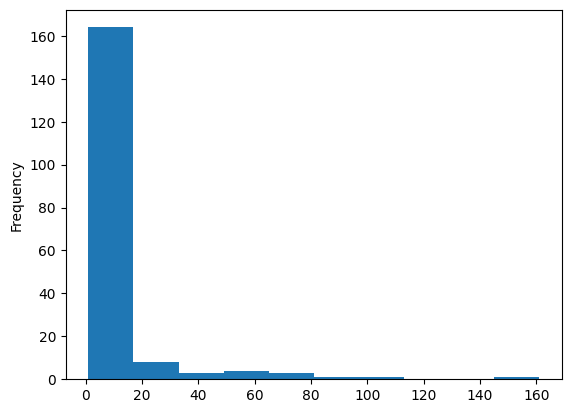

In [46]:
df["Genus"].value_counts().plot(kind='hist')

In [47]:
#Seaborn plot - not as beneficial this time so I'm not using it
#plot frequency of genus for all entires
#x = df["Genus"].value_counts()
#sns.histplot(data=df, x=x)

Since there are so many distributed around 0-15, I'm going to exclude those and print the value counts of the higher ones.

In [48]:
count = df[df.Genus.isin(df["Genus"].value_counts(dropna=False).loc[lambda x : x>=16].index)].copy()
count["Genus"].value_counts()

Genus
Streptococcus        161
Enterococcus         110
Propionibacterium     92
Lactobacillus         73
Helicobacter          70
Prevotella            65
Staphylococcus        64
Bacteroides           63
Escherichia           61
Clostridium           58
Corynebacterium       38
Fusobacterium         36
Actinomyces           34
Bifidobacterium       31
Treponema             25
Gardnerella           22
Klebsiella            21
Eubacterium           21
Neisseria             19
Porphyromonas         17
Capnocytophaga        17
Veillonella           16
Name: count, dtype: int64

Since the list is limited, I could have guessed the index number until I got to the value I wanted. 

In [49]:
df['Genus'].value_counts(ascending=False)[:22]

Genus
Streptococcus        161
Enterococcus         110
Propionibacterium     92
Lactobacillus         73
Helicobacter          70
Prevotella            65
Staphylococcus        64
Bacteroides           63
Escherichia           61
Clostridium           58
Corynebacterium       38
Fusobacterium         36
Actinomyces           34
Bifidobacterium       31
Treponema             25
Gardnerella           22
Klebsiella            21
Eubacterium           21
Neisseria             19
Capnocytophaga        17
Porphyromonas         17
Veillonella           16
Name: count, dtype: int64

Let's see if this changes based on a subset of the most prevalent organisms.

In [50]:
top_organisms=micro.sort_values(by='Gene Count', ascending = False)[:1000]

<Axes: xlabel='Gene Count', ylabel='Count'>

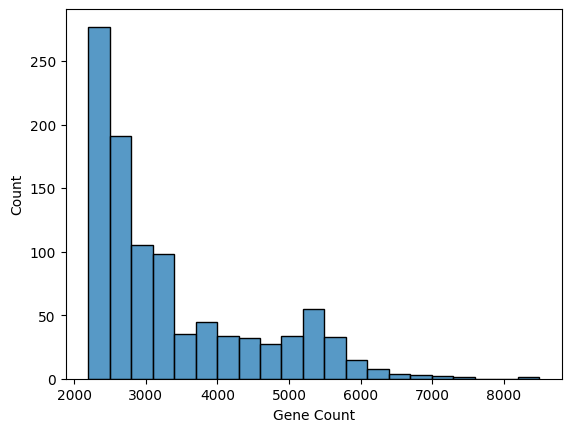

In [51]:
sns.histplot(data=top_organisms, x="Gene Count")

In [52]:
# add genus column to the top_organisms
top = top_organisms
top['Genus'] = top['Organism Name'].str.split(' ').str[0]

In [53]:
top['Genus'].value_counts()[:22]

Genus
Enterococcus         109
Propionibacterium     91
Staphylococcus        62
Bacteroides           62
Escherichia           60
Clostridium           57
Streptococcus         53
Prevotella            51
Corynebacterium       32
Treponema             24
Lactobacillus         22
Klebsiella            21
Fusobacterium         20
Actinomyces           17
Neisseria             17
Capnocytophaga        16
Parabacteroides       15
Acinetobacter         14
Bifidobacterium       12
Providencia           11
Eubacterium            9
Selenomonas            8
Name: count, dtype: int64

In the original histogram, we saw that the highest frequency of species was between 1800-2400 gene count, so I am going to make a dataframe around that.

In [54]:
mid_microbe = micro[(micro['Gene Count'].values >= 1800) & (micro['Gene Count'].values <= 2400)]

In [55]:
mid_microbe['Genus'] = mid_microbe['Organism Name'].str.split(' ').str[0]

In [56]:
mid_microbe["Genus"].value_counts().sort_values(ascending=False)[:22]

Genus
Streptococcus            142
Lactobacillus             30
Staphylococcus            27
Prevotella                25
Corynebacterium           23
Bifidobacterium           21
Propionibacterium         20
Fusobacterium             19
Actinomyces               14
Veillonella               13
Porphyromonas             10
Selenomonas               10
Haemophilus               10
Mobiluncus                 8
Capnocytophaga             5
Anaerococcus               5
Neisseria                  4
Peptostreptococcaceae      4
Helicobacter               4
Oribacterium               4
Leptotrichia               4
Peptoniphilus              4
Name: count, dtype: int64

Now that I'm comfortable with having added "Genus" to my dataframes, I'm going to replace the main dataframe with the amended one.

In [57]:
df = micro

I want to know how many unique sites on the human body were researched.

In [58]:
micro['HMP Isolation Body Site'].nunique()

12

In [59]:
micro['HMP Isolation Body Site'].value_counts()

HMP Isolation Body Site
gastrointestinal_tract    437
unknown                   324
oral                      317
urogenital_tract          249
skin                      127
airways                    53
blood                      49
nose                        2
heart                       2
liver                       1
wound                       1
lymph_nodes                 1
Name: count, dtype: int64

Here is a chart of the species diversity at the different sites.

Text(0.5, 0, 'Name of body site')

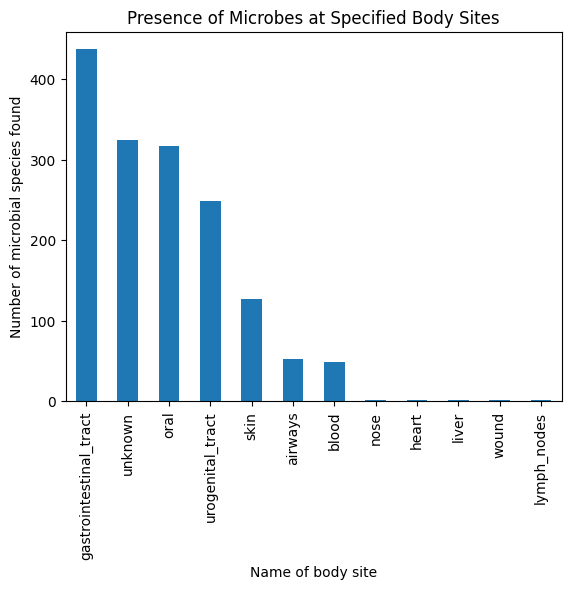

In [60]:
micro['HMP Isolation Body Site'].value_counts().plot(kind='bar')
plt.title('Presence of Microbes at Specified Body Sites')
plt.ylabel('Number of microbial species found')
plt.xlabel('Name of body site')

To find out more about the kingdom variance throughout the body, I'll look into those values.

In [61]:
micro.groupby('NCBI Superkingdom')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)

NCBI Superkingdom
Bacteria     11
Eukaryota     3
Archaea       1
Viruses       1
Name: HMP Isolation Body Site, dtype: int64

The Bacteria Kingdom is most prevelent throughout the body, so I'm going to look more closely that their locations by making a dataframe with the values from the "bacterial" domain.

In [62]:
#Select Bacterial domain and check body sites
bac=micro.loc[micro['Domain']=='BACTERIAL']
bac['HMP Isolation Body Site'].unique()

array(['oral', 'airways', 'urogenital_tract', 'skin',
       'gastrointestinal_tract', 'blood', 'unknown', 'liver', 'nose',
       'heart', 'lymph_nodes'], dtype=object)

Text(0.5, 1.0, 'Presence of bacteria at different body sites')

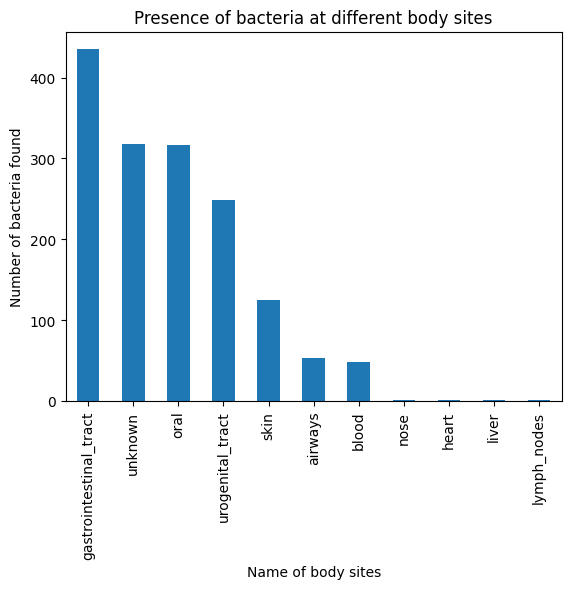

In [63]:
#Plot
bac['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of bacteria found')
plt.xlabel('Name of body sites')
plt.title('Presence of bacteria at different body sites')

The greatest amount of bacteria are found in the gastrointestinal tract. Let's look at the other kingdoms.

In [64]:
#Select Eukaryal domain and check body sites
euk=micro.loc[micro['Domain']=='EUKARYAL']
euk['HMP Isolation Body Site'].unique()

array(['unknown', 'skin', 'wound'], dtype=object)

Text(0.5, 1.0, 'Diversity of eukaryotes at different body sites')

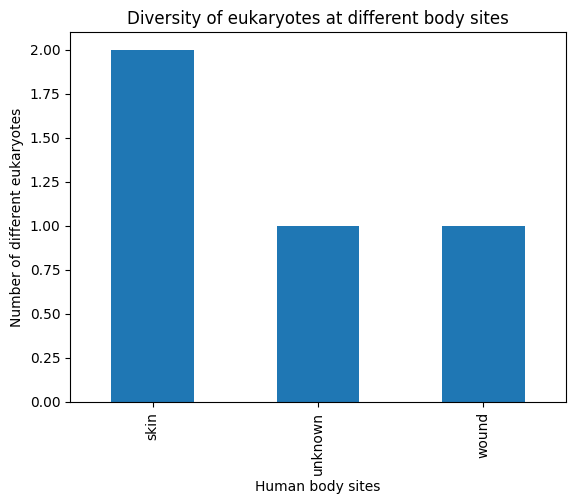

In [65]:
#plot
euk['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different eukaryotes')
plt.xlabel('Human body sites')
plt.title('Diversity of eukaryotes at different body sites')

The greatest amount of eukaryotes are found on the skin. 

In [66]:
vir=micro.loc[micro['Domain']=='VIRUS']
vir['HMP Isolation Body Site'].unique()

array(['unknown'], dtype=object)

From the data that we have, we are unable to determine where the greatest number of viruses are located. I'm guessing this is because viruses infect and replicate in cells, sometimes mainly infecting neighboring cells, but often spreading throughout the body. 

In [67]:
arc=micro.loc[micro['Domain']=='ARCHAEAL']
arc['HMP Isolation Body Site'].unique()

array(['gastrointestinal_tract'], dtype=object)

Based on this project, archaea are found solely in the Gastrointestinal Tract.

Streptococcus are the most prevalent throughout the body. Let's look further into this.

Text(0.5, 1.0, 'Location and Prevalence of Streptococcal Bacteria')

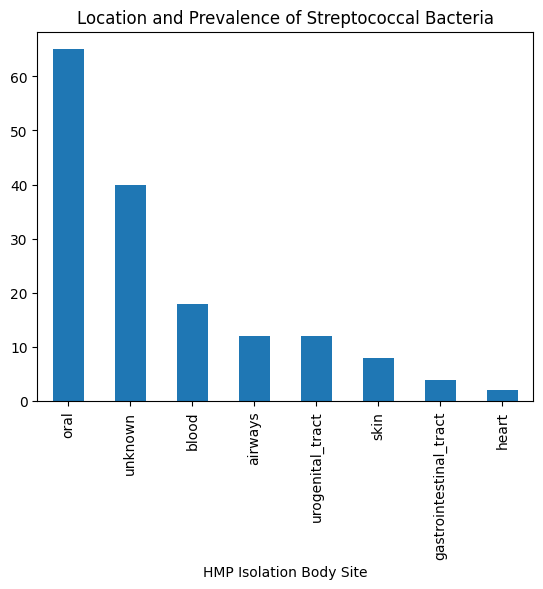

In [68]:
strep=micro.loc[micro['Genus']=='Streptococcus']
strep['HMP Isolation Body Site'].value_counts().plot(kind='bar')
plt.title("Location and Prevalence of Streptococcal Bacteria")

Let's see how other top genuses compare.

                   HMP Isolation Body Site
Genus                                     
Streptococcus                            8
Staphylococcus                           7
Enterococcus                             6
Prevotella                               6
Corynebacterium                          6
Haemophilus                              5
Klebsiella                               5
Propionibacterium                        5
Bifidobacterium                          5
Neisseria                                5
Fusobacterium                            5
Actinomyces                              5


Text(0.5, 1.0, 'Number of organism genuses for different microorganisms')

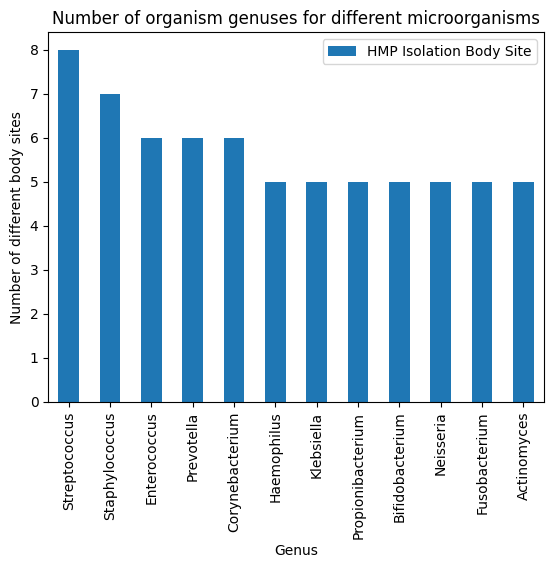

In [69]:
genus_site=micro.groupby('Genus')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)
genus_df=pd.DataFrame(genus_site)
top_genus=genus_df[genus_df['HMP Isolation Body Site']>4]
print(top_genus)
top_genus.plot(kind='bar')
plt.ylabel('Number of different body sites')
plt.title('Number of organism genuses for different microorganisms')

Because viruses are limited, we can print all of their names. 

In [70]:
viruses= micro[micro['NCBI Superkingdom'] =='Viruses']
viruses['Organism Name']

2852    Pseudomonas phage F_HA0480sp/Pa1651
2853                Pseudomonas phage JBD18
2854                Pseudomonas phage JBD25
2855                Pseudomonas phage JBD26
2856                Pseudomonas phage JBD67
Name: Organism Name, dtype: object

Because eukaryotes are limited, we can print all of their names. 

In [71]:
eukaryotes= micro[micro['NCBI Superkingdom']=='Eukaryota']
eukaryotes['Organism Name']

601                  Exophiala dermatitidis NIH/UT8656
983                    Phialophora europaea CBS 101466
985     Mucor circinelloides f. circinelloides 1006PhL
1065                   Sporothrix schenckii ATCC 58251
Name: Organism Name, dtype: object

Because archaea are limited, we can print all of their names. 

In [72]:
archaea= micro[micro['NCBI Superkingdom']=='Archaea']
archaea['Organism Name']

302    Methanobrevibacter smithii DSM 2374
303    Methanobrevibacter smithii DSM 2375
Name: Organism Name, dtype: object

In [73]:
micro['NCBI Superkingdom'].value_counts()

NCBI Superkingdom
Bacteria     1552
Viruses         5
Eukaryota       4
Archaea         2
Name: count, dtype: int64

Observations from this EDA:
 - Gastrointestinal system shows most diversity of microbes
 - Streptomyces sp. HGB0020 shows the maximum gene count in human
 - Streptococcus is most common genus

#### Milestone 2

*I made a lot of transformations previously because I felt like they were important for visualizations, but there are still more I can do for preparing a model. My goal is to use a predictive model to figure out which organisms are likely to be present in various locations of the body (outlined in the data as "HMP Isolation Body Sites") and, in theory, that would be used to make predictions on how to restore the microbiome of a specific patient, based on the sequencing of their sample.*

In [74]:
# change df name for transformations
df = micro 

In [75]:
df.head()

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Unnamed: 17,Unnamed: 18,Genus
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",NaN,NaN,Abiotrophia
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",NaN,NaN,Achromobacter
2,5,Gi03554,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,Level 5: Non-contiguous Finished,6. annotation (and sequence) public on NCBI site,38739,ACRC00000000,6010,0,HOMD: tax_343,Broad Institute,NIH-HMP Jumpstart Supplement,BEI HM-235,NaN,NaN,Achromobacter
3,10,Gi03422,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38509,ACQB00000000,3832,647533101,HOMD: tax_554,Broad Institute,NIH-HMP Jumpstart Supplement,"ATCC 19606, DSM 6974",NaN,NaN,Acinetobacter
4,12,Gi03421,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,38337,ACPK00000000,3632,646206267,NaN,Broad Institute,NIH-HMP Jumpstart Supplement,LMG 10517,NaN,NaN,Acinetobacter


In [76]:
#find na values
df.isna().sum()

HMP ID                        0
GOLD ID                      70
Organism Name                 0
Domain                        0
NCBI Superkingdom             0
HMP Isolation Body Site       0
Project Status                0
Current Finishing Level       0
NCBI Submission Status        0
NCBI Project ID               0
Genbank ID                    0
Gene Count                    0
IMG/HMP ID                    0
HOMD ID                    1177
Sequencing Center             0
Funding Source                0
Strain Repository ID        296
Unnamed: 17                1563
Unnamed: 18                1563
Genus                         0
dtype: int64

In [77]:
#check percentage missing values
round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False)

Unnamed: 18                100.00
Unnamed: 17                100.00
HOMD ID                     75.30
Strain Repository ID        18.94
GOLD ID                      4.48
HMP ID                       0.00
Funding Source               0.00
Sequencing Center            0.00
IMG/HMP ID                   0.00
Gene Count                   0.00
Genbank ID                   0.00
NCBI Project ID              0.00
NCBI Submission Status       0.00
Current Finishing Level      0.00
Project Status               0.00
HMP Isolation Body Site      0.00
NCBI Superkingdom            0.00
Domain                       0.00
Organism Name                0.00
Genus                        0.00
dtype: float64

In [78]:
# HOMD ID has 75% missing values so I'm checking it
df['HOMD ID']

0       HOMD: tax_389
1                 NaN
2       HOMD: tax_343
3       HOMD: tax_554
4                 NaN
            ...      
2910              NaN
2911              NaN
2912              NaN
2913              NaN
2914              NaN
Name: HOMD ID, Length: 1563, dtype: object

The unnamed columns provide no information so they can be removed. HOMD ID isn't necessary for analysis so it can be removed as well.

In [79]:
df2 = df.drop(['Unnamed: 18', 'Unnamed: 17', 'HOMD ID'], axis=1)

In [80]:
#check percentage missing values
round((df2.isnull().sum() * 100/ len(df2)),2).sort_values(ascending=False)

Strain Repository ID       18.94
GOLD ID                     4.48
HMP ID                      0.00
NCBI Project ID             0.00
Funding Source              0.00
Sequencing Center           0.00
IMG/HMP ID                  0.00
Gene Count                  0.00
Genbank ID                  0.00
NCBI Submission Status      0.00
Current Finishing Level     0.00
Project Status              0.00
HMP Isolation Body Site     0.00
NCBI Superkingdom           0.00
Domain                      0.00
Organism Name               0.00
Genus                       0.00
dtype: float64

In [81]:
df['Strain Repository ID']

0                ATCC 49176, CIP 103242
1       ATCC 43553, CIP 55774, LMG 6100
2                            BEI HM-235
3                  ATCC 19606, DSM 6974
4                             LMG 10517
                     ...               
2910                         BEI HM-909
2911                         ATCC 43718
2912                         BEI HM-755
2913                         ATCC 27337
2914                         BEI HM-756
Name: Strain Repository ID, Length: 1563, dtype: object

In [82]:
df["GOLD ID"]

0       Gi03551
1       Gi03555
2       Gi03554
3       Gi03422
4       Gi03421
         ...   
2910    Gi08654
2911    Gi09593
2912    Gi09594
2913    Gi09595
2914    Gi09596
Name: GOLD ID, Length: 1563, dtype: object

In [83]:
#HOMD ID and Strain Repository ID are not necessary for analysis so they can be dropped
df2 = df2.drop(['Strain Repository ID', 'GOLD ID'], axis=1)

In [84]:
df2.columns.tolist()

['HMP ID',
 'Organism Name',
 'Domain',
 'NCBI Superkingdom',
 'HMP Isolation Body Site',
 'Project Status',
 'Current Finishing Level',
 'NCBI Submission Status',
 'NCBI Project ID',
 'Genbank ID',
 'Gene Count',
 'IMG/HMP ID',
 'Sequencing Center',
 'Funding Source',
 'Genus']

In [85]:
#removing the rest of the ID columns
df2 = df2.drop(['NCBI Project ID',
 'Genbank ID', 'IMG/HMP ID'], axis=1)

In [86]:
#new df name to preserve previous
df = df2

In [87]:
df.columns.tolist()

['HMP ID',
 'Organism Name',
 'Domain',
 'NCBI Superkingdom',
 'HMP Isolation Body Site',
 'Project Status',
 'Current Finishing Level',
 'NCBI Submission Status',
 'Gene Count',
 'Sequencing Center',
 'Funding Source',
 'Genus']

In [88]:
# subset of df
test_df = df[['HMP ID',
 'Organism Name',
 'Domain',
 'NCBI Superkingdom',
 'HMP Isolation Body Site',
 'Gene Count',
 'Genus']]

In [89]:
test_df.shape

(1563, 7)

In [90]:
#checking size and unique values of columns
df['Genus'].value_counts()

Genus
Streptococcus        161
Enterococcus         110
Propionibacterium     92
Lactobacillus         73
Helicobacter          70
                    ... 
Pediococcus            1
Mycobacterium          1
Micrococcus            1
Leuconostoc            1
Acetobacteraceae       1
Name: count, Length: 185, dtype: int64

In [91]:
# rename for to preserve previous
new_df = test_df

In [92]:
new_df

,HMP ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Gene Count,Genus
0,1,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,1950,Abiotrophia
1,4,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,5755,Achromobacter
2,5,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,6010,Achromobacter
3,10,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,3832,Acinetobacter
4,12,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,3632,Acinetobacter
...,...,...,...,...,...,...,...
2910,9995,Staphylococcus epidermidis NIHLM095,BACTERIAL,Bacteria,unknown,2300,Staphylococcus
2911,9996,Aggregatibacter actinomycetemcomitans Y4,BACTERIAL,Bacteria,oral,2343,Aggregatibacter
2912,9997,Corynebacterium durum F0235,BACTERIAL,Bacteria,oral,2823,Corynebacterium
2913,9998,Peptostreptococcus anaerobius VPI 4330,BACTERIAL,Bacteria,oral,1933,Peptostreptococcus


I want to remove Domain or Superkingdom because they seem to have the same information, but first I need to check that. I'm going to convert the strings to lowercase so I may make a clean comparison. Then I'll search for the root words in the other column and see if any are not the same (check if they are all duplicated).

In [93]:
new_df['Domain'] = new_df['Domain'].str.lower()
new_df['Domain']

0       bacterial
1       bacterial
2       bacterial
3       bacterial
4       bacterial
          ...    
2910    bacterial
2911    bacterial
2912    bacterial
2913    bacterial
2914    bacterial
Name: Domain, Length: 1563, dtype: object

In [94]:
new_df['NCBI Superkingdom'] = new_df['NCBI Superkingdom'].str.lower()
new_df['NCBI Superkingdom'] 

0       bacteria
1       bacteria
2       bacteria
3       bacteria
4       bacteria
          ...   
2910    bacteria
2911    bacteria
2912    bacteria
2913    bacteria
2914    bacteria
Name: NCBI Superkingdom, Length: 1563, dtype: object

In [95]:
# use apply to find if the "superkingdom" string is in "domain", if it is not, return NaN. 
new_df['New'] = new_df.apply(lambda x: x['NCBI Superkingdom'] if x['NCBI Superkingdom'] in
                     x['Domain'] else np.nan, axis=1)

In [96]:
#check NA value total
new_df['New'].isna().sum()

9

In [97]:
#There are 9 null values so we can see review the entries manually
new_df[new_df['New'].isna()]

,HMP ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Gene Count,Genus,New
601,1120,Exophiala dermatitidis NIH/UT8656,eukaryal,eukaryota,unknown,0,Exophiala,NaN
983,1541,Phialophora europaea CBS 101466,eukaryal,eukaryota,skin,0,Phialophora,NaN
985,1544,Mucor circinelloides f. circinelloides 1006PhL,eukaryal,eukaryota,skin,0,Mucor,NaN
1065,1624,Sporothrix schenckii ATCC 58251,eukaryal,eukaryota,wound,0,Sporothrix,NaN
2852,9774,Pseudomonas phage F_HA0480sp/Pa1651,virus,viruses,unknown,0,Pseudomonas,NaN
2853,9843,Pseudomonas phage JBD18,virus,viruses,unknown,0,Pseudomonas,NaN
2854,9847,Pseudomonas phage JBD25,virus,viruses,unknown,0,Pseudomonas,NaN
2855,9848,Pseudomonas phage JBD26,virus,viruses,unknown,0,Pseudomonas,NaN
2856,9886,Pseudomonas phage JBD67,virus,viruses,unknown,0,Pseudomonas,NaN


I see that these are duplicates as well, so all of the values between "NCBI Superkingdom" and "Domain" are the same. I can remove one of them. I am choosing to drop "NCBI Superkingdom" as well as the "new" column I used for comparison purposes.

In [98]:
new_df = new_df.drop(['NCBI Superkingdom', 'New'], axis=1)

In [99]:
new_df.columns.to_list()

['HMP ID',
 'Organism Name',
 'Domain',
 'HMP Isolation Body Site',
 'Gene Count',
 'Genus']

In [100]:
new_df.shape

(1563, 6)

In [101]:
new_df["Organism Name"].nunique()

1557

There are too many unique organisms to make them into dummies, so I'm going to try a couple of different approaches. I'll see how it looks to se Genus as predictor and HMP Body Site 

In [102]:
new_df["Genus"].nunique()

185

#Make new df of dummy variables for all but the "HMP ID" (not helpful for modeling) and "Gene Count" (already numerical)
set_df = pd.get_dummies(data=new_df, columns=['Domain', 'HMP Isolation Body Site', 'Genus', 'Organism Name'])

From milestone 2: These are the necessary columns for correlating and making predictions for regions of the body. I'm going to attempt to build a model by first labeling the predictor and outcome variables, then splitting the data and running a model. I was imagining a knearest neighbor model, but a logistic regression might be more appropriate... or I may be way off and in need of direction!

#### Milestone 3

## KNN Classifier

In [103]:
new_df.columns

Index(['HMP ID', 'Organism Name', 'Domain', 'HMP Isolation Body Site',
       'Gene Count', 'Genus'],
      dtype='object')

### Target is Genus

In [104]:
#I selected this order of variables through trial & error based on the accuracy below
genus_df = new_df[["Domain", "Gene Count", "HMP Isolation Body Site"]]

In [105]:
#get dummy variables for model scaling/fitting
genus_df = pd.get_dummies(genus_df)

In [107]:
X = genus_df #features
y = new_df["Genus"] #target

In [108]:
#split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [109]:
#Scale/fit/transform
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) ### fit training data above
X_test_scaled = scaler.transform(X_test) ### ((fitting leaks information from test into train))

The code below was an attempt to scale target values to see if that would be beneficial, but it is not.

In [110]:
# y_train_scale = scaler.fit_transform(X_train) ### fit training data above <br>
# y_test_scale = scaler.transform(X_test) ### ((fitting leaks information from test into train))

In [111]:
#define classifier and fit
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [112]:
#calculate accuracy
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.34185303514376997

I attempted to use hyperparamter tuning (below) based on Exercise 9.2 and it gave me some insight, even though it called an error because the least populated class in y only has 1 member. 

In [113]:
#adjust to match other assignment
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train_scaled)
X_test = standardizer.transform(X_test_scaled)

#define classifier and build pipeline
knn = KNeighborsClassifier()
pipe = Pipeline([('standardizer', standardizer), ('classifier', knn)])

In [114]:
# fit pipeline
pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [115]:
#score the knn model on the testing data
pipe.score(X_test_scaled, y_test)

0.3450479233226837

In [116]:
# define search space
search_space = [{"classifier__n_neighbors": range(1,20,1)}]

In [117]:
#gridsearch has an error, but the process still works.
gridsearch = GridSearchCV(pipe, search_space, cv=5).fit(X_train_scaled, y_train)
gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': range(1, 20)}])

In [118]:
# get best parameters based 
gridsearch.best_estimator_.get_params()["classifier"]

KNeighborsClassifier(n_neighbors=9)

In [119]:
# run pipeline with indicated number of neighbors
knn = KNeighborsClassifier(n_neighbors=9)
pipe = Pipeline([('standardizer', standardizer), ('classifier', knn)])
pipe.fit(X_train_scaled, y_train)
#score the knn model on the testing data
pipe.score(X_test_scaled,y_test)

0.3610223642172524

The accuracy is higher. Still not great in any way, but good enough to move on.

### Target is HMP Isolation Body Site

Repeat steps above with HMP Isolation Body Site as the target.

In [120]:
body_df = new_df[["Genus","Domain", "Gene Count" ]]

In [121]:
body_df = pd.get_dummies(body_df)

In [122]:
X = body_df
y = new_df['HMP Isolation Body Site']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [124]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) ### fit training data above
X_test_scaled = scaler.transform(X_test) ### ((fitting leaks information from test into train))

In [125]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [126]:
y_pred = classifier.predict(X_test_scaled)

In [127]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5846645367412141

I attempted to use hyperparamter tuning (below) based on Exercise 9.2 and it gave me some insight, even though it called an error because the least populated class in y only has 1 member. 

In [128]:
standardizer = scaler
X_train_scaled = standardizer.fit_transform(X_train)
X_test_scale = standardizer.transform(X_test)

knn = KNeighborsClassifier()
pipe = Pipeline([('standardizer', standardizer), ('classifier', knn)])

In [129]:
pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [130]:
#score the knn model on the testing data
pipe.score(X_test_scaled,y_test)

0.5846645367412141

In [131]:
search_space = [{"classifier__n_neighbors": range(1,20,1)}]

In [132]:
#gridsearch has an error, but the process still works.
gridsearch = GridSearchCV(pipe, search_space, cv=5).fit(X_train_scaled, y_train)
gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardizer', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier__n_neighbors': range(1, 20)}])

In [133]:
gridsearch.best_estimator_.get_params()["classifier"]

KNeighborsClassifier()

In [134]:
knn = KNeighborsClassifier(n_neighbors=10)
pipe = Pipeline([('standardizer', standardizer), ('classifier', knn)])
pipe.fit(X_train_scaled, y_train)
#score the knn model on the testing data
pipe.score(X_test_scaled,y_test)

0.6038338658146964

This method of target variable is looking better!

## Logistic Regression

Repeat the steps from KNN but use logistic regression with both types of features/targets.

### Target is Genus

In [135]:
genus_df = new_df[["Domain", "HMP Isolation Body Site", "Gene Count"]]

In [136]:
genus_df = pd.get_dummies(genus_df)

In [137]:
X = genus_df
y = new_df["Genus"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [139]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) ### fit training data above
X_test_scaled = scaler.transform(X_test) ### ((fitting leaks information from test into train))

The code below was an attempt to scale target values to see if that would be beneficial, but it is not.

In [140]:
#y_train_scale = scaler.fit_transform(X_train) ### fit training data above <br>
#y_test_scale = scaler.transform(X_test) ### ((fitting leaks information from test into train))

In [141]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [142]:
y_pred = log_reg.predict(X_test_scaled)

In [143]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3354632587859425

### Target is body site

In [144]:
body_df = new_df[["Genus","Domain", "Gene Count" ]]

In [145]:
body_df = pd.get_dummies(body_df)

In [146]:
X = body_df
y = new_df['HMP Isolation Body Site']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [148]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) ### fit training data above
X_test_scaled = scaler.transform(X_test) ### ((fitting leaks information from test into train))

In [149]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [150]:
y_pred = log_reg.predict(X_test_scaled)

In [151]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.645367412140575

This is lower than I had hoped, but not terrible. I'm curious if I had used a larger dataset, if there would have had higher accuracy. Maybe I can try that again later. I'm not sure what to do, I pored over these models and tried rearranging, refitting, scaling, not scaling, etc. so I'm happy with these basics that are left. Building a model to predict the location based on the sample of bacteria seems like it has the most liklihood of being a good model. Looking forward to honing these skills!

## Summary of Project

This was a fascinating exploration in data mining. I am really grateful to have been able to merge my previous research focus (microbiome health) with these new skills. I am quick to recognize how novice I am in this field and that my approaches are elementary, but hypothesizing about what discoveries could be made using machine learning in this field has been very stimulating for me. I completed a  meta-analysis years ago in effort to apply the framework from ecosystem restoration principles of ecology to restoration of the human gut. There was little, if not no, discussion about this approach to healing and health within the medical field. A sentiment analysis may have been a good method for that work, but as I've become more interested in the biological aspect, I chose to look at the organisms themselves. Since the publication of that project years ago, the Human Microbiome Project has expanded their database exponentially. The data is collected from two primary sites and is obviously not comprehensive of the population as whole. That alone is a huge ethical implication for using this data to make predictions on the population as a whole. There were a few things to consider with the steps I took in my data process, one of them being the exclusion of all data that was not marked as a completed "Project Status." In my cleaning process, I felt like having these values removed would make this practice experience less prone to error. Given that the accuracy of my models was not as high as I would have liked, I don't know if this is true. Ideally, I would go back and include this data to run the models again, to see if the expanded training data would allow for better prediction of the test data. With this in consideration, I would say the model is not ready to be deployed, but the revisions for the dataset seems to have been appropriately applied, so there may be more efficacy if I expanded the number of points to include the incomplete set, or modeled it a bit differently with better understanding of the models' capabilities/other models that could be applied. I also would like to explore other methods of measuring accuracy as, pointed out by Professor Werner, there are many ways to evaluate a model. Overall this was a super fun experience. I really enjoyed the cleaning and transformation stages, and am happy that the exploration and modeling are becoming more enjoyable. I'm certainly gaining more proficiency and am looking forward to honing my skills further. <br>

Thank you for this excellent course, Professor Werner! 